In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
os.chdir('D:\Imarticus\ML')

In [3]:
os.listdir()

['Covid 19',
 'Crop_Recommendation_Model',
 'data_dictionary_trip_records_yellow.pdf',
 'Decision Tree',
 'Ensemble',
 'KNN',
 'Linear Regression',
 'Logistic Regression',
 'LR',
 'Notes251(AutoRecovered).xlsx',
 'QA',
 'SVM',
 'Untitled2.ipynb',
 'World Happiness Index',
 'yellow_tripdata_2022-06.parquet',
 'Zomato',
 'zomato.csv']

In [4]:
taxi_data=pd.read_parquet(r'yellow_tripdata_2022-06.parquet')

In [5]:
taxi_data.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-06-01 00:25:41,2022-06-01 00:48:22,1.0,11.00,1.0,N,70,48,1,32.0,3.00,0.5,2.00,6.55,0.3,44.35,2.5,0.00
1,1,2022-06-01 00:44:40,2022-06-01 01:01:48,1.0,4.20,1.0,N,170,226,1,14.0,3.00,0.5,0.00,0.00,0.3,17.80,2.5,0.00
2,2,2022-06-01 00:23:07,2022-06-01 00:39:50,1.0,9.49,1.0,N,264,113,1,26.0,0.50,0.5,5.00,6.55,0.3,42.60,2.5,1.25
3,1,2022-06-01 00:25:53,2022-06-01 00:57:06,2.0,12.10,1.0,N,132,17,2,37.0,1.75,0.5,0.00,0.00,0.3,39.55,0.0,1.25
4,1,2022-06-01 00:23:58,2022-06-01 00:33:43,0.0,1.80,1.0,N,140,163,1,9.0,3.00,0.5,2.55,0.00,0.3,15.35,2.5,0.00


In [6]:
taxi_data.shape

(3558124, 19)

In [7]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3558124 entries, 0 to 3558123
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [8]:
taxi,_=train_test_split(taxi_data, test_size=.98, random_state=0)

In [9]:
taxi.shape

(71162, 19)

In [10]:
_.shape

(3486962, 19)

### EDA

In [11]:
taxi['VendorID'].value_counts()

2    50189
1    20830
6      143
Name: VendorID, dtype: int64

In [12]:
def univariate_cat(data,x):
    missing=data[x].isnull().sum()
    unique_cnt=data[x].nunique()
    unique_cat=list(data[x].unique())
    
    f1=pd.DataFrame(data[x].value_counts(dropna=False))
    f1.rename(columns={x:"Count"},inplace=True)
    f2=pd.DataFrame(data[x].value_counts(normalize=True))
    f2.rename(columns={x:"Percentage"},inplace=True)
    f2["Percentage"]=(f2["Percentage"]*100).round(2).astype(str)+" %"
    ff=pd.concat([f1,f2],axis=1)
    
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique category : {unique_cnt}\n")
    print(f"Unique categories : \n{unique_cat}")
    print(f"Value count and % : \n{ff}")
    
    sns.countplot(data=data,x=x)
    plt.show()

Total missing values : 0

Total count of unique category : 3

Unique categories : 
[2, 1, 6]
Value count and % : 
   Count Percentage
2  50189    70.53 %
1  20830    29.27 %
6    143      0.2 %


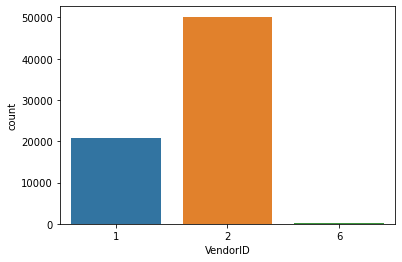

In [13]:
univariate_cat(taxi,'VendorID')

In [14]:
taxi['VendorID']=taxi['VendorID'].replace([6,5],'Other')

In [15]:
taxi['VendorID'].value_counts()

2        50189
1        20830
Other      143
Name: VendorID, dtype: int64

Total missing values : 2660

Total count of unique category : 2

Unique categories : 
['N', None, 'Y']
Value count and % : 
      Count Percentage
N     67674    98.79 %
None   2660        NaN
Y       828     1.21 %


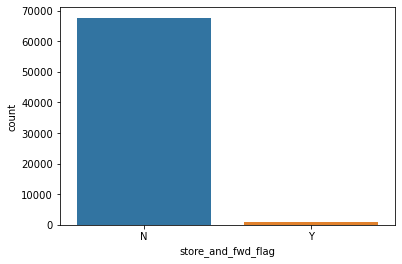

In [16]:
univariate_cat(taxi,'store_and_fwd_flag')

In [17]:
taxi['store_and_fwd_flag'].fillna('Other',inplace=True)     
# taxi['store_and_fwd_flag'].replace(np.nan,'other')

In [18]:
taxi['store_and_fwd_flag'].value_counts()

N        67674
Other     2660
Y          828
Name: store_and_fwd_flag, dtype: int64

In [19]:
taxi['RatecodeID'].value_counts()

1.0     64553
2.0      2826
5.0       612
3.0       217
99.0      206
4.0        88
Name: RatecodeID, dtype: int64

In [20]:
taxi['RatecodeID']=taxi['RatecodeID'].map({1:'Standard rate',
                                          2:'JFK',
                                          3:'Newark',
                                          4:'Nassau or Westchester',
                                          5:'Negotiated fare',
                                          6:'Group ride',
                                          99:'other'})

Total missing values : 2660

Total count of unique category : 6

Unique categories : 
['Standard rate', nan, 'Negotiated fare', 'JFK', 'Newark', 'Nassau or Westchester', 'other']
Value count and % : 
                       Count Percentage
Standard rate          64553    94.24 %
JFK                     2826     4.13 %
NaN                     2660        NaN
Negotiated fare          612     0.89 %
Newark                   217     0.32 %
other                    206      0.3 %
Nassau or Westchester     88     0.13 %


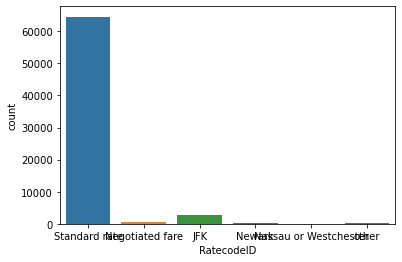

In [21]:
univariate_cat(taxi,'RatecodeID')

In [22]:
taxi['RatecodeID']=taxi['RatecodeID'].replace(np.nan,'other')

Total missing values : 0

Total count of unique category : 5

Unique categories : 
[1, 2, 0, 4, 3]
Value count and % : 
   Count Percentage
1  53921    75.77 %
2  13873    19.49 %
0   2660     3.74 %
3    363     0.51 %
4    345     0.48 %


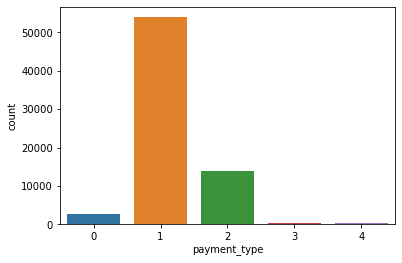

In [23]:
univariate_cat(taxi,'payment_type')

# 1= Credit card
# 2= Cash
# 3= No charge
# 4= Dispute
# 5= Unknown
# 6= Voided trip

In [24]:
taxi['payment_type']=taxi['payment_type'].map({1:'Credit card',
                                          2:'Cash',
                                          3:'No charge',
                                          4:'Dispute',
                                          0:'Unknown'})

In [25]:
def univariate_num(data,x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min(),2)
    max1=round(data[x].max(),2)
    mean=round(data[x].mean(),2)
    var=round(data[x].var(),2)
    std=round(data[x].std(),2)
    range1=round(max1-min1,2)
    q1=round(data[x].quantile(.25),2)
    q2=round(data[x].quantile(.50),2)
    q3=round(data[x].quantile(.75),2)
    skew=round(data[x].skew(),2)
    kurt=round(data[x].kurt(),2)
    myvalue={"missing" : missing,"min" : min1,"max" : max1,"mean" : mean,"var" : var, "std" : std,"range" : range1,
             "q1" : q1,"q2" : q2,"q3" : q3,"skewness" : skew,"Kurtosis" : kurt}
#     sns.histplot(data[x])
#     plt.show()
    sns.boxplot(data=data,y=data[x])
#     plt.show()
    return myvalue

{'missing': 2660,
 'min': 0.0,
 'max': 6.0,
 'mean': 1.4,
 'var': 0.92,
 'std': 0.96,
 'range': 6.0,
 'q1': 1.0,
 'q2': 1.0,
 'q3': 1.0,
 'skewness': 2.74,
 'Kurtosis': 8.32}

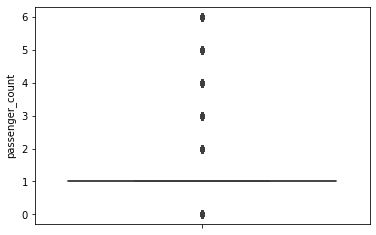

In [26]:
univariate_num(taxi,'passenger_count')

{'missing': 0,
 'min': 0.0,
 'max': 111375.9,
 'mean': 5.14,
 'var': 174326.41,
 'std': 417.52,
 'range': 111375.9,
 'q1': 1.14,
 'q2': 1.94,
 'q3': 3.63,
 'skewness': 266.71,
 'Kurtosis': 71143.4}

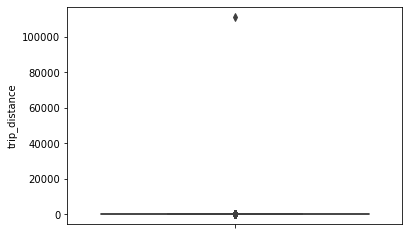

In [27]:
univariate_num(taxi,'trip_distance')

In [28]:
taxi.drop(columns=['DOLocationID','PULocationID'],inplace=True)

In [29]:
taxi[taxi['fare_amount']<=2.5].shape

(904, 17)

In [30]:
taxi1=taxi[taxi['fare_amount']>=2.5]

In [31]:
taxi1.shape

(70637, 17)

C:\Users\ABHAY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare_amount'>

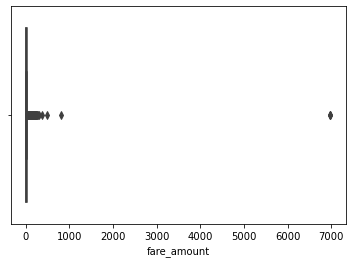

In [32]:
sns.boxplot(taxi1['fare_amount'])

{'missing': 0,
 'min': 0.0,
 'max': 8.25,
 'mean': 1.03,
 'var': 1.58,
 'std': 1.26,
 'range': 8.25,
 'q1': 0.0,
 'q2': 0.5,
 'q3': 2.5,
 'skewness': 1.14,
 'Kurtosis': 0.75}

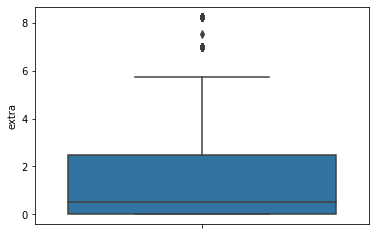

In [33]:
univariate_num(taxi1,'extra')

In [34]:
taxi1[taxi1['extra']==0].shape

(28530, 17)

{'missing': 0,
 'min': 0.0,
 'max': 2.78,
 'mean': 0.49,
 'var': 0.0,
 'std': 0.05,
 'range': 2.78,
 'q1': 0.5,
 'q2': 0.5,
 'q3': 0.5,
 'skewness': -6.5,
 'Kurtosis': 188.41}

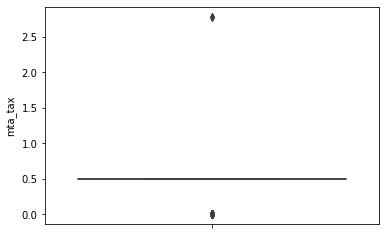

In [35]:
univariate_num(taxi1,'mta_tax')

{'missing': 0,
 'min': 0.0,
 'max': 98.0,
 'mean': 2.81,
 'var': 10.4,
 'std': 3.22,
 'range': 98.0,
 'q1': 1.0,
 'q2': 2.2,
 'q3': 3.45,
 'skewness': 3.82,
 'Kurtosis': 44.22}

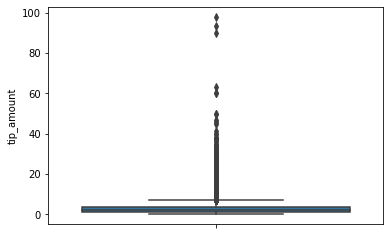

In [36]:
univariate_num(taxi1,'tip_amount')

{'missing': 0,
 'min': 0.0,
 'max': 52.0,
 'mean': 0.57,
 'var': 4.33,
 'std': 2.08,
 'range': 52.0,
 'q1': 0.0,
 'q2': 0.0,
 'q3': 0.0,
 'skewness': 4.8,
 'Kurtosis': 36.86}

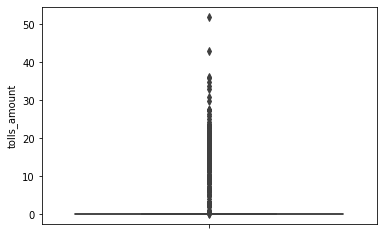

In [37]:
univariate_num(taxi1,'tolls_amount')

{'missing': 0,
 'min': 0.0,
 'max': 0.3,
 'mean': 0.3,
 'var': 0.0,
 'std': 0.0,
 'range': 0.3,
 'q1': 0.3,
 'q2': 0.3,
 'q3': 0.3,
 'skewness': -76.71,
 'Kurtosis': 5881.83}

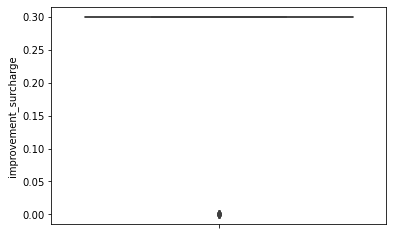

In [38]:
univariate_num(taxi1,'improvement_surcharge')

In [39]:
taxi1[taxi1['improvement_surcharge']==0].shape

(12, 17)

In [40]:
taxi1.drop(columns='improvement_surcharge',inplace=True)

C:\Users\ABHAY\AppData\Local\Temp\ipykernel_10608\1836431459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi1.drop(columns='improvement_surcharge',inplace=True)


{'missing': 0,
 'min': 3.3,
 'max': 6981.3,
 'mean': 22.45,
 'var': 2374.85,
 'std': 48.73,
 'range': 6978.0,
 'q1': 12.36,
 'q2': 16.3,
 'q3': 23.3,
 'skewness': 123.63,
 'Kurtosis': 17609.46}

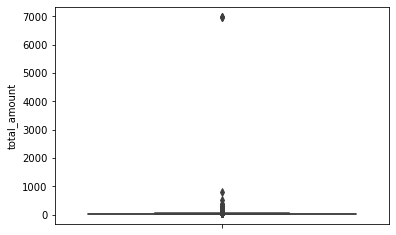

In [41]:
univariate_num(taxi1,'total_amount')

{'missing': 2658,
 'min': 0.0,
 'max': 2.5,
 'mean': 2.31,
 'var': 0.44,
 'std': 0.67,
 'range': 2.5,
 'q1': 2.5,
 'q2': 2.5,
 'q3': 2.5,
 'skewness': -3.17,
 'Kurtosis': 8.08}

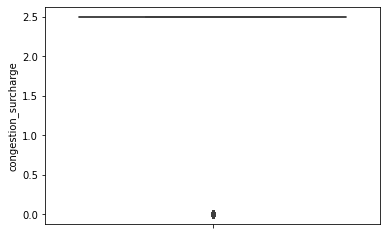

In [42]:
univariate_num(taxi1,'congestion_surcharge')

{'missing': 2658,
 'min': 0.0,
 'max': 1.25,
 'mean': 0.1,
 'var': 0.11,
 'std': 0.34,
 'range': 1.25,
 'q1': 0.0,
 'q2': 0.0,
 'q3': 0.0,
 'skewness': 3.15,
 'Kurtosis': 7.92}

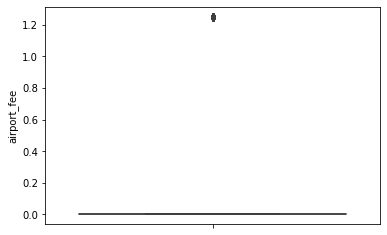

In [43]:
univariate_num(taxi1,'airport_fee')

### Feature Engineering 

In [44]:
taxi1.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [45]:
taxi['tpep_pickup_datetime'].min()

Timestamp('2002-10-21 12:53:50')

In [46]:
taxi['tpep_pickup_datetime'].max()

Timestamp('2022-07-01 00:36:12')

Date : Month, weekend / weekday, public holiday, time of pickup (erly morning,k afternoon, evening, night, late night) <br>
Two Dates : Duration

In [47]:
taxi1['month']=taxi1['tpep_pickup_datetime'].dt.month
taxi1['year']=taxi1['tpep_pickup_datetime'].dt.year
taxi1['week_of_day']=taxi1['tpep_pickup_datetime'].dt.dayofweek
taxi1['day']=taxi1['tpep_pickup_datetime'].dt.day
taxi1['hours']=taxi1['tpep_pickup_datetime'].dt.hour

C:\Users\ABHAY\AppData\Local\Temp\ipykernel_10608\941063554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi1['month']=taxi1['tpep_pickup_datetime'].dt.month
C:\Users\ABHAY\AppData\Local\Temp\ipykernel_10608\941063554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi1['year']=taxi1['tpep_pickup_datetime'].dt.year
C:\Users\ABHAY\AppData\Local\Temp\ipykernel_10608\941063554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [48]:
taxi1['day'].value_counts()

9     2650
23    2636
17    2617
16    2612
15    2594
3     2562
24    2539
2     2527
10    2523
1     2520
8     2519
7     2474
14    2440
11    2393
21    2389
4     2388
22    2376
29    2357
30    2351
25    2346
13    2326
18    2274
6     2200
28    2181
12    2061
5     2032
27    2023
19    1990
20    1954
26    1782
31       1
Name: day, dtype: int64

In [49]:
taxi1['week_of_day'].value_counts()

3    12775
2    12364
4    10243
1     9484
5     9402
0     8503
6     7866
Name: week_of_day, dtype: int64

In [50]:
taxi1['day'].value_counts()

9     2650
23    2636
17    2617
16    2612
15    2594
3     2562
24    2539
2     2527
10    2523
1     2520
8     2519
7     2474
14    2440
11    2393
21    2389
4     2388
22    2376
29    2357
30    2351
25    2346
13    2326
18    2274
6     2200
28    2181
12    2061
5     2032
27    2023
19    1990
20    1954
26    1782
31       1
Name: day, dtype: int64

In [51]:
taxi1=taxi1[taxi1['month']==6]
taxi1=taxi1[taxi1['year']==2022]

In [52]:
taxi1['isweekend']=np.where(taxi1['week_of_day'].isin([5,6]),1,0)

In [53]:
def day_cut(x):
    if x<=10:
        return "starting_of_month"
    elif x>10 and x<=20:
        return "mid_of_month"
    else:
        return "end_of_month"

In [54]:
taxi1['day_cut']=taxi1['day'].apply(lambda a : day_cut(a))

In [55]:
taxi1['day_cut'].value_counts()

starting_of_month    24393
mid_of_month         23261
end_of_month         22973
Name: day_cut, dtype: int64

In [56]:
def hour_cat(x):
    if x >= 4 and x < 8:
        return "early_morning"
    elif x >=8 and x < 12:
        return "morning"
    elif x >=12 and x < 16:
        return "afternoon"
    elif x >=16 and x<20:
        return "evening"
    elif x >=20 and x<24:
        return "night"
    elif x>=0 and x<4:
        return "mid_night"
    else:
        return "unknown"
    

In [57]:
taxi1['hour_cat']=taxi1['hours'].apply(lambda a : hour_cat(a))

In [58]:
taxi1['hour_cat'].value_counts()

evening          18554
afternoon        16450
night            14011
morning          12794
mid_night         4824
early_morning     3994
Name: hour_cat, dtype: int64

In [59]:
# taxi1['duration']=((taxi1['tpep_dropoff_datetime']-taxi1['tpep_pickup_datetime'])*24).astype('time')

In [60]:
taxi1['duration']=(taxi1['tpep_dropoff_datetime']-taxi1['tpep_pickup_datetime'])/pd.Timedelta(minutes=1)

In [61]:
taxi1['duration'].min()

-0.85

In [62]:
taxi1['duration'].max()

1439.4166666666667

In [63]:
taxi1['duration'].value_counts()

12.000000    101
9.000000     100
14.000000     90
16.000000     85
13.000000     85
            ... 
62.100000      1
80.016667      1
75.400000      1
65.566667      1
53.333333      1
Name: duration, Length: 4559, dtype: int64

<AxesSubplot:xlabel='duration', ylabel='Count'>

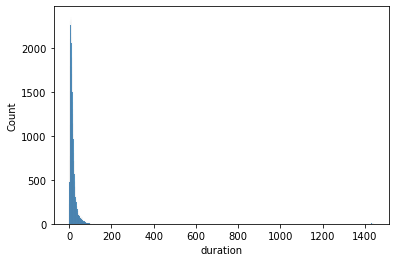

In [64]:
sns.histplot(data=taxi1,x='duration')

In [65]:
def duration_cat(x):
    if x<15:
        return "duration_bt_0_150min"
    elif x>=15 and x<30 :
        return "duration_bt_15_30min"
    elif x>=30 and x<60 :
        return "duration_bt_30_60min"
    elif x>=60 and x<120 :
        return "duration_bt_60_120min"
    else:
        return "duration_morethan_120min"

In [66]:
taxi1['duration_cat']=taxi1['duration'].apply(lambda a : duration_cat(a))

In [67]:
taxi1['duration_cat'].value_counts()

duration_bt_0_150min        41741
duration_bt_15_30min        20678
duration_bt_30_60min         6757
duration_bt_60_120min        1350
duration_morethan_120min      101
Name: duration_cat, dtype: int64

In [68]:
taxi1['airport_pickup']=np.where(taxi1['airport_fee']==0,0,1)
taxi1['airport_pickup']

11293      0
3241804    0
2122208    0
645015     0
1752107    0
          ..
2249467    0
963395     0
2215104    0
1484405    0
305711     0
Name: airport_pickup, Length: 70627, dtype: int32

In [69]:
taxi1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70627 entries, 11293 to 305711
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               70627 non-null  object        
 1   tpep_pickup_datetime   70627 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  70627 non-null  datetime64[ns]
 3   passenger_count        67969 non-null  float64       
 4   trip_distance          70627 non-null  float64       
 5   RatecodeID             70627 non-null  object        
 6   store_and_fwd_flag     70627 non-null  object        
 7   payment_type           70627 non-null  object        
 8   fare_amount            70627 non-null  float64       
 9   extra                  70627 non-null  float64       
 10  mta_tax                70627 non-null  float64       
 11  tip_amount             70627 non-null  float64       
 12  tolls_amount           70627 non-null  float64       
 

In [70]:
taxi1.groupby('fare_amount')['total_amount'].agg({'max'})

,max
fare_amount,
2.50,67.30
3.00,11.80
3.25,3.75
3.50,16.80
3.93,4.36
...,...
495.00,495.30
808.00,808.30
6966.50,6970.30


In [71]:
taxi1['fare_amount'].value_counts()

7.50     2992
7.00     2983
6.00     2923
6.50     2897
8.00     2852
         ... 
32.53       1
19.65       1
63.39       1
24.39       1
19.05       1
Name: fare_amount, Length: 1715, dtype: int64

In [72]:
taxi1['total_amount'].value_counts()

10.80     1028
11.80      978
12.36      969
10.30      965
12.80      963
          ... 
75.86        1
205.55       1
24.22        1
42.19        1
85.10        1
Name: total_amount, Length: 3937, dtype: int64

In [73]:
def fare_cut(x):
    if x<10:
        return "(0-10]"
    elif x>10 and x<=20:
        return "(10-20]"
    elif x>20 and x<=30:
        return "(20-30]"
    elif x>30 and x<=40:
        return "(30-40]"
    elif x>40 and x<=50:
        return "(40-50]"
    elif x>50 and x<=60:
        return "(50-60]"
    elif x>60 and x<=70:
        return "(60-70]"
    elif x>70 and x<=80:
        return "(70-80]"
    elif x>80 and x<=90:
        return "(80-90]"
    elif x>90 and x<=100:
        return "(90-100]"
    else:
        return "100+"

In [74]:
taxi1['fare_cut']=taxi1['fare_amount'].apply(lambda a: fare_cut(a))

<AxesSubplot:>

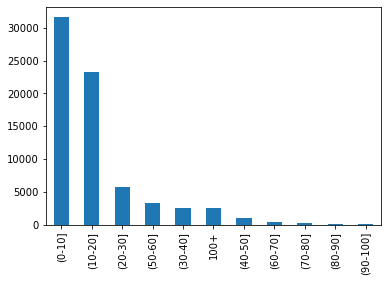

In [75]:
taxi1['fare_cut'].value_counts().plot(kind='bar')

### Bivariate

### Missing Value Treatment

In [76]:
taxi1.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          2658
trip_distance               0
RatecodeID                  0
store_and_fwd_flag          0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
total_amount                0
congestion_surcharge     2658
airport_fee              2658
month                       0
year                        0
week_of_day                 0
day                         0
hours                       0
isweekend                   0
day_cut                     0
hour_cat                    0
duration                    0
duration_cat                0
airport_pickup              0
fare_cut                    0
dtype: int64

In [77]:
taxi1[taxi1.isnull()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,...,week_of_day,day,hours,isweekend,day_cut,hour_cat,duration,duration_cat,airport_pickup,fare_cut
11293,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3241804,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2122208,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
645015,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1752107,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249467,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
963395,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2215104,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1484405,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
temp0=taxi1[taxi1['passenger_count'].isnull()]

In [79]:
temp0.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          2658
trip_distance               0
RatecodeID                  0
store_and_fwd_flag          0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
total_amount                0
congestion_surcharge     2658
airport_fee              2658
month                       0
year                        0
week_of_day                 0
day                         0
hours                       0
isweekend                   0
day_cut                     0
hour_cat                    0
duration                    0
duration_cat                0
airport_pickup              0
fare_cut                    0
dtype: int64

In [80]:
taxi2=taxi1.dropna()

In [81]:
taxi2.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
total_amount             0
congestion_surcharge     0
airport_fee              0
month                    0
year                     0
week_of_day              0
day                      0
hours                    0
isweekend                0
day_cut                  0
hour_cat                 0
duration                 0
duration_cat             0
airport_pickup           0
fare_cut                 0
dtype: int64

In [82]:
taxi2.drop(columns=['tpep_pickup_datetime','tpep_dropoff_datetime'],inplace=True)

C:\Users\ABHAY\AppData\Local\Temp\ipykernel_10608\175399171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi2.drop(columns=['tpep_pickup_datetime','tpep_dropoff_datetime'],inplace=True)


In [83]:
taxi2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67969 entries, 11293 to 305711
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   VendorID              67969 non-null  object 
 1   passenger_count       67969 non-null  float64
 2   trip_distance         67969 non-null  float64
 3   RatecodeID            67969 non-null  object 
 4   store_and_fwd_flag    67969 non-null  object 
 5   payment_type          67969 non-null  object 
 6   fare_amount           67969 non-null  float64
 7   extra                 67969 non-null  float64
 8   mta_tax               67969 non-null  float64
 9   tip_amount            67969 non-null  float64
 10  tolls_amount          67969 non-null  float64
 11  total_amount          67969 non-null  float64
 12  congestion_surcharge  67969 non-null  float64
 13  airport_fee           67969 non-null  float64
 14  month                 67969 non-null  int64  
 15  year          

### Outliers

In [84]:
taxi2.describe(percentiles=[.01,.02,.03,.04,.05,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
passenger_count,67969.0,1.398682,0.959825,0.0,0.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.00,2.00,3.000000,4.0000,4.000000,5.000000,6.000,6.000000
trip_distance,67969.0,3.541137,4.782556,0.0,0.000000,0.250000,0.4,0.470000,0.510000,1.130000,1.900000,3.55,9.02,15.496000,17.0928,17.879600,18.680000,20.260,410.170000
fare_amount,67969.0,15.271000,48.398615,2.5,3.500000,4.000000,4.0,4.500000,4.500000,7.000000,10.500000,16.50,31.20,52.000000,52.0000,52.000000,52.000000,62.500,6977.000000
extra,67969.0,1.069702,1.263564,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.500000,2.50,3.00,3.500000,3.5000,3.500000,3.500000,3.750,8.250000
mta_tax,67969.0,0.494910,0.052014,0.0,0.000000,0.500000,0.5,0.500000,0.500000,0.500000,0.500000,0.50,0.50,0.500000,0.5000,0.500000,0.500000,0.500,2.780000
tip_amount,67969.0,2.765738,3.209275,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,2.160000,3.36,5.66,9.550000,10.2700,11.960000,12.620000,15.000,98.000000
tolls_amount,67969.0,0.562375,2.062867,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.00,6.550000,6.5500,6.550000,6.550000,6.550,52.000000
total_amount,67969.0,22.169266,49.525152,3.3,6.800000,7.800000,8.3,8.760000,8.800000,12.350000,15.960000,22.88,43.35,63.100000,67.8528,73.100000,75.720000,81.120,6981.300000
congestion_surcharge,67969.0,2.307670,0.666214,0.0,0.000000,0.000000,0.0,0.000000,0.000000,2.500000,2.500000,2.50,2.50,2.500000,2.5000,2.500000,2.500000,2.500,2.500000
airport_fee,67969.0,0.097361,0.334997,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.00,1.250000,1.2500,1.250000,1.250000,1.250,1.250000


In [85]:
ob_var=taxi2.dtypes[taxi2.dtypes=='object'].index
num_var=taxi2.dtypes[taxi2.dtypes!='object'].index

In [86]:
taxi_num=taxi2[num_var]
taxi_ob=taxi2[ob_var]

In [87]:
def outliers(x):
    x=x.clip(upper=x.quantile(.99))
#   x=x.clip(lower=x.quantile(.1))
    return x

In [88]:
taxi_num1=taxi_num.apply(outliers)

In [89]:
taxi_num1

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,airport_fee,month,year,week_of_day,day,hours,isweekend,duration,airport_pickup
11293,1.0,1.75,9.5,0.0,0.5,2.00,0.00,14.80,2.5,0.0,6,2022,2,1,8,0,12.166667,0
3241804,1.0,9.16,36.0,0.0,0.5,0.00,0.00,39.30,2.5,0.0,6,2022,2,29,12,0,49.183333,0
2122208,1.0,5.00,20.0,3.0,0.5,2.00,0.00,25.80,2.5,0.0,6,2022,6,19,1,1,23.900000,0
645015,1.0,3.02,13.5,1.0,0.5,1.78,0.00,19.58,2.5,0.0,6,2022,0,6,17,0,18.900000,0
1752107,1.0,3.53,14.5,0.5,0.5,2.74,0.00,21.04,2.5,0.0,6,2022,2,15,22,0,18.483333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2249467,1.0,4.49,17.0,0.0,0.5,2.00,0.00,22.30,2.5,0.0,6,2022,0,20,14,0,18.200000,0
963395,1.0,1.51,8.5,0.0,0.5,2.36,0.00,14.16,2.5,0.0,6,2022,3,9,10,0,9.166667,0
2215104,0.0,8.90,25.5,2.5,0.5,5.30,6.55,40.65,2.5,0.0,6,2022,0,20,6,0,16.250000,0
1484405,3.0,0.90,5.0,1.0,0.5,0.00,0.00,9.30,2.5,0.0,6,2022,0,13,19,0,4.183333,0


In [90]:
taxi_final=pd.concat([taxi_num1,taxi_ob],axis=1)

In [91]:
taxi_final.drop(columns=['month','year'],inplace=True)

In [92]:
taxi_final.drop(columns='fare_amount',inplace=True)

In [94]:
taxi_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67969 entries, 11293 to 305711
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   passenger_count       67969 non-null  float64
 1   trip_distance         67969 non-null  float64
 2   extra                 67969 non-null  float64
 3   mta_tax               67969 non-null  float64
 4   tip_amount            67969 non-null  float64
 5   tolls_amount          67969 non-null  float64
 6   total_amount          67969 non-null  float64
 7   congestion_surcharge  67969 non-null  float64
 8   airport_fee           67969 non-null  float64
 9   week_of_day           67969 non-null  int64  
 10  day                   67969 non-null  int64  
 11  hours                 67969 non-null  int64  
 12  isweekend             67969 non-null  int32  
 13  duration              67969 non-null  float64
 14  airport_pickup        67969 non-null  int32  
 15  VendorID      

### Multicolinearity

<AxesSubplot:>

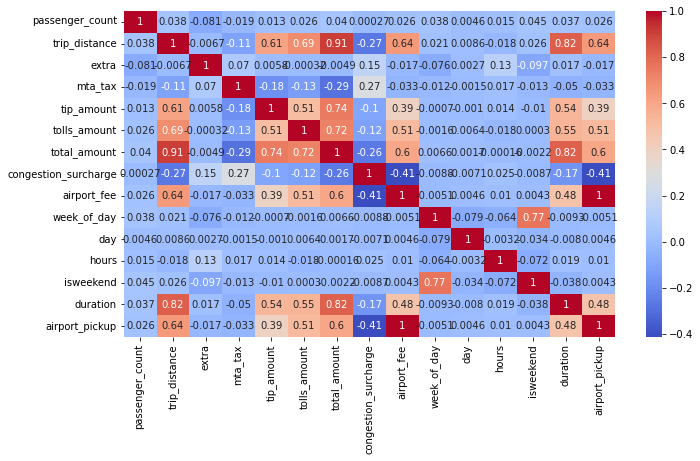

In [95]:
cr=taxi_final.corr()
plt.figure(figsize=(11,6))
sns.heatmap(cr,annot=True, cmap='coolwarm')

<AxesSubplot:>

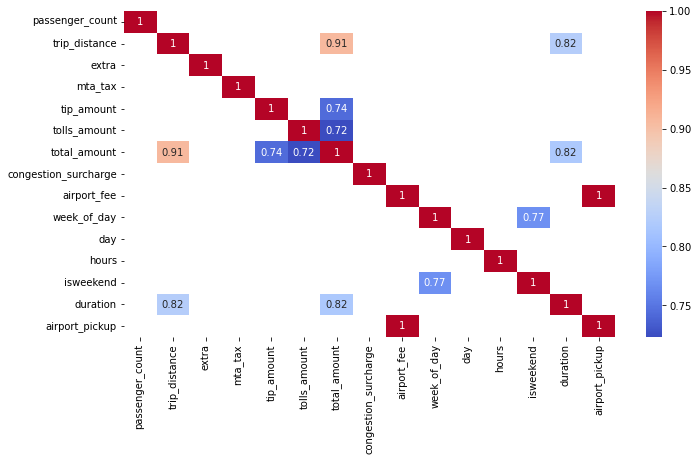

In [96]:
cr=cr[abs(cr)>.7]
plt.figure(figsize=(11,6))
sns.heatmap(cr,annot=True, cmap='coolwarm')

In [97]:
taxi_final.drop(columns=['fare_cut','duration_cat'],inplace=True)

### Dummy Creation

In [98]:
final=pd.get_dummies(data=taxi_final, drop_first=True)

C:\Users\ABHAY\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [99]:
final.head()

,passenger_count,trip_distance,extra,mta_tax,tip_amount,tolls_amount,total_amount,congestion_surcharge,airport_fee,week_of_day,...,payment_type_Credit card,payment_type_Dispute,payment_type_No charge,day_cut_mid_of_month,day_cut_starting_of_month,hour_cat_early_morning,hour_cat_evening,hour_cat_mid_night,hour_cat_morning,hour_cat_night
11293,1.0,1.75,0.0,0.5,2.00,0.0,14.80,2.5,0.0,2,...,1,0,0,0,1,0,0,0,1,0
3241804,1.0,9.16,0.0,0.5,0.00,0.0,39.30,2.5,0.0,2,...,0,0,0,0,0,0,0,0,0,0
2122208,1.0,5.00,3.0,0.5,2.00,0.0,25.80,2.5,0.0,6,...,1,0,0,1,0,0,0,1,0,0
645015,1.0,3.02,1.0,0.5,1.78,0.0,19.58,2.5,0.0,0,...,1,0,0,0,1,0,1,0,0,0
1752107,1.0,3.53,0.5,0.5,2.74,0.0,21.04,2.5,0.0,2,...,1,0,0,1,0,0,0,0,0,1


### Model Development

In [100]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV

In [101]:
y=final['total_amount']
x=final.drop(columns=['total_amount'])

In [102]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.3,random_state=0)

In [103]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [104]:
print('Train_score',rfr.score(x_train,y_train))
print('Test_score',rfr.score(x_test,y_test))

Train_score 0.9974023234992128
Test_score 0.9834840540373749


In [ ]:
pred_train=rfr.predict(x_train)
pred_test=rfr.predict(x_test)

In [ ]:
print("Train MSE", np.mean((pred_train-y_train)**(2)))
print("Train rmse", np.sqrt(np.mean((pred_train-y_train)**(2))))
print("Train MAE",  np.mean(np.abs(pred_train-y_train)))
print("Train MAPE",  np.mean(np.abs((pred_train-y_train)/y_train)))

In [124]:
print("Test MSE", np.mean((pred_test-y_test)**(2)))
print("Test rmse", np.sqrt(np.mean((pred_test-y_test)**(2))))
print("Test MAE",  np.mean(np.abs(pred_test-y_test)))
print("Test MAPE",  np.mean(np.abs((pred_test-y_test)/y_test)))

Test MSE 4.219647767290192
Test rmse 2.0541781245282
Test MAE 0.511030107236855
Test MAPE 0.02274932844365742


In [ ]:
import time
tic=time.time()

params={'n_estimators':[100,150,200],
         'criterion': ['squared_error','absolute_error'],
         'max_depth': [7,9,11,15],
         'min_samples_split': [50,100,200],
         'min_samples_leaf': [5,10,15,20],
         'max_features':['sqrt','log2'],
         'bootstrap':[True]
        }
rfr1=RandomForestRegressor()
gs_rfr=GridSearchCV(estimator=rfr1, param_grid=params, cv=10, n_jobs=-1, verbose=1)
gs_rfr.fit(x_train,y_train)

toc=time.time()
print('\n Total time taken :', toc-tic)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
